In [39]:
import os
import configparser
import os.path as osp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [40]:
def get_dataset_path(dataset_name: str) -> str:
    config_path = osp.join(os.getcwd(), 'config.ini')
    parser = configparser.ConfigParser()
    parser.read(config_path)
    data_path = None
    if dataset_name == 'DCU_NVT_EXP1':
        data_path = parser['DATA_PATH']['dcu_nvt_dataset_path']
    elif dataset_name in ['WESAD_CHEST', 'WESAD_WRIST']:
        data_path = parser['DATA_PATH']['wesad_dataset_path']
    elif dataset_name == 'AffectiveROAD':
        data_path = parser['DATA_PATH']['affectiveROAD_dataset_path']
    return data_path

In [41]:
def load_stats_feature(dataset_name: str, WINDOW_SHIFT: int = 20, WINDOW_SIZE: int = 60):
    data_path = get_dataset_path(dataset_name)
    data_path = osp.join(data_path, f'{dataset_name}_stats_feats_{WINDOW_SHIFT}_{WINDOW_SIZE}.npy')
    stats_feature = np.load(data_path)
    return stats_feature

In [42]:
def load_group(dataset_name: str, WINDOW_SHIFT: int = 20, WINDOW_SIZE: int = 60):
    data_path = get_dataset_path(dataset_name)
    data_path = osp.join(data_path, f'{dataset_name}_groups_{WINDOW_SHIFT}_{WINDOW_SIZE}.npy')
    groups = np.load(data_path)
    return groups

In [43]:
def load_ground_truth(dataset_name: str, WINDOW_SHIFT: int = 20, WINDOW_SIZE: int = 60):
    data_path = get_dataset_path(dataset_name)
    data_path = osp.join(data_path, f'{dataset_name}_ground_truth_{WINDOW_SHIFT}_{WINDOW_SIZE}.npy')
    ground_truth = np.load(data_path)
    return ground_truth

In [44]:
dataset_name = 'DCU_NVT_EXP1'
dataset_name = 'WESAD_CHEST'
dataset_name = 'AffectiveROAD'
# dataset_name = 'WESAD_WRIST'

In [45]:
stats_feature = load_stats_feature(dataset_name, 15, 30)
groups = load_group(dataset_name, 15, 30)
data = pd.DataFrame(data=stats_feature)
ground_truth = load_ground_truth(dataset_name, 15, 30)

FileNotFoundError: [Errno 2] No such file or directory: '/home/nvtu/PhD_Work/StressDetection/DATA/MyDataset/AffectiveROAD_Data/Database/AffectiveROAD_stats_feats_15.npy'

In [ ]:
column_name = [
# HRV features
'mean_HR', 'std_HR', 'mean_HRV', 'std_HRV', 'kurtosis_HRV', 'skewness_HRV', 'nn50', 'HRV_pNN50', 'HRV_pNN25', 'HRV_TINN', 'HRV_RMSSD', 'HRV_LF', 'HRV_HF', 'HRV_LFHF', 'HRV_LFnorm', 'HRV_HFnorm', 'HRV_SD1', 'HRV_SD2', 'HRV_SDRR_RMSSD', 'mean_relativeRRI', 'median_relativeRRI', 'std_relativeRRI', 'RMSSD_relativeRRI', 'kurtosis_relativeRRI', 'skew_relativeRRI', 
# EDA features
'mean_scl', 'std_scl', 'std_scr', 'corr', 
'num_responses', 'sum_scr_response_duration', 'sum_scr_amplitude', 
'area_of_response_curve', 
'num_scr_peaks', 'mean_eda', 'std_eda', 'min_eda', 'max_eda', 
'eda_dynamic_range', 
'mean_scr', 'max_scr', 'min_scr', 'kurtosis_scr', 'skewness_scr', 
'mean_first_grad', 'std_first_grad', 'mean_second_grad', 
'std_second_grad', 
'mean_peaks', 'max_peaks', 'min_peaks','std_peaks', 'mean_onsets', 
'max_onsets', 'min_onsets', 'std_onsets', 
'ALSC', 'INSC', 'APSC', 'RMSC']

In [ ]:
print(column_name[11], column_name[13], column_name[14], column_name[32], column_name[22], column_name[27], column_name[0], column_name[21], column_name[59])

HRV_LF HRV_LFHF HRV_LFnorm area_of_response_curve RMSSD_relativeRRI std_scr mean_HR std_relativeRRI RMSC


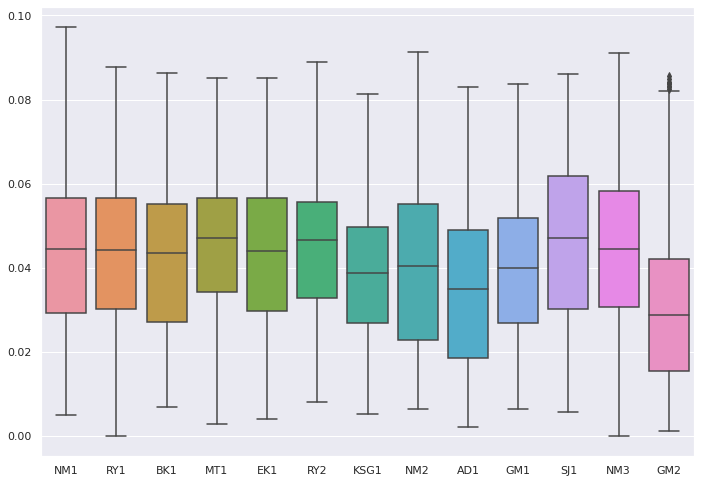

In [ ]:
sns.boxplot(x=groups, y=stats_feature[:, 11])

In [ ]:
USER_ID = 'S14'
indices = len(np.where(groups == USER_ID)[0])
print(indices)

0


In [ ]:
print(len(groups))

40133
